In [ ]:
!ls

Breast_cancer_data.csv	breast_cancer.png  sample_data


In [ ]:
import numpy as np
import pandas as pd
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [ ]:
df = pd.read_csv('Breast_cancer_data.csv')

In [ ]:
df.head()

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0


In [ ]:
df.isna().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

In [ ]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state = 1)

In [ ]:
clf = DecisionTreeClassifier(max_depth=3)

In [ ]:
clf = clf.fit(X_train,y_train)

In [ ]:
y_pred = clf.predict(X_test)

In [ ]:
print("Accuracy : ", metrics.accuracy_score(y_test,y_pred))

Accuracy :  0.8538011695906432


In [ ]:
pip install graphviz

In [ ]:
pip install pydotplus

In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six

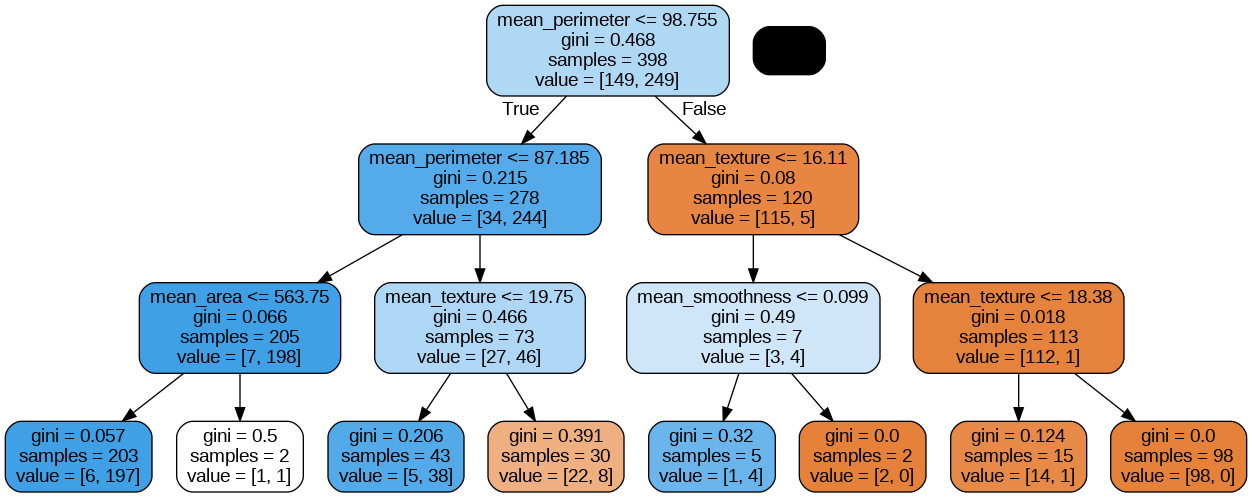

In [ ]:
from sklearn.tree import export_graphviz
from IPython.display import Image
import pydotplus
from sklearn.externals.six import StringIO

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data, filled=True, rounded=True, feature_names=X.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())

graph.write_png('breast_cancer.png')
Image(graph.create_png())


In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from matplotlib import pyplot

In [ ]:
from sklearn.datasets import make_classification
X, y = make_classification(n_samples=10000,n_features=20,n_informative=5,n_redundant=15,random_state=11)
print(X.shape,y.shape)

(10000, 20) (10000,)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [ ]:
train_scores , test_scores = list() , list()
values = [i for i in range(1,21)]

In [ ]:
for i in values:
  model = DecisionTreeClassifier(max_depth=i)
  model.fit(X_train,y_train)
  train_yhat = model.predict(X_train)
  train_acc = accuracy_score(y_train,train_yhat)
  train_scores.append(train_acc)
  test_yhat = model.predict(X_test)
  test_acc = accuracy_score(y_test,test_yhat)
  test_scores.append(test_acc)
  print('>%d, train : %.3f,test: %.3f'%(i,train_acc,test_acc))

>1, train : 0.666,test: 0.663
>2, train : 0.754,test: 0.737
>3, train : 0.873,test: 0.874
>4, train : 0.922,test: 0.921
>5, train : 0.936,test: 0.920
>6, train : 0.954,test: 0.933
>7, train : 0.967,test: 0.943
>8, train : 0.976,test: 0.945
>9, train : 0.983,test: 0.954
>10, train : 0.989,test: 0.950
>11, train : 0.994,test: 0.950
>12, train : 0.996,test: 0.949
>13, train : 0.997,test: 0.948
>14, train : 0.998,test: 0.947
>15, train : 0.999,test: 0.949
>16, train : 1.000,test: 0.949
>17, train : 1.000,test: 0.948
>18, train : 1.000,test: 0.948
>19, train : 1.000,test: 0.946
>20, train : 1.000,test: 0.949


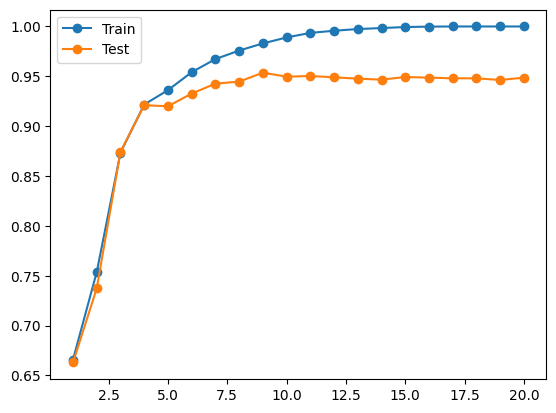

In [ ]:
pyplot.plot(values,train_scores,'-o',label='Train')
pyplot.plot(values,test_scores,'-o',label='Test')
pyplot.legend()
pyplot.show()